# ¿Cómo se relacionan el volumen de negociación y la volatilidad de las acciones de energía?

## Introduccion

**Contexto empresarial.** Usted es analista en un gran banco centrado en inversiones en acciones de recursos naturales. Los recursos naturales son vitales para una variedad de industrias en nuestra economía. Recientemente, su división se ha interesado en las siguientes acciones:

1. Dominion Energy Inc.
2. Exelon Corp.
3. NextEra Energy Inc.
4. Condado del Sur
5. Duke Energy Corp.

Todas estas acciones son parte del sector energético, un sector importante pero volátil del mercado de valores. Si bien la alta volatilidad aumenta la posibilidad de grandes ganancias, también hace que sea más probable que se produzcan grandes pérdidas, por lo que el riesgo debe administrarse cuidadosamente con acciones de alta volatilidad.

Debido a que su empresa es bastante grande, debe haber suficiente volumen de negociación (cantidad promedio de acciones negociadas por día) para que pueda realizar transacciones fácilmente en estas acciones. De lo contrario, este efecto combinado con la alta volatilidad natural de las acciones podría hacer que estas sean demasiado riesgosas para que el banco invierta.



**Problema empresarial.** Dado que tanto el bajo volumen de negociación como la alta volatilidad presentan riesgos para sus inversiones, el líder de su equipo le pide que investigue lo siguiente: **"¿Cómo se relaciona la volatilidad de las acciones de energía con su volumen de negociación diario promedio? "**

**Contexto analítico.** Los datos que se le proporcionaron están en formato de valores separados por comas (CSV) y comprenden datos de precios y volumen de negociación para las acciones anteriores. Este caso comienza con una breve descripción general de estos datos, después de lo cual: (1) aprenderá a usar la biblioteca de Python ```pandas``` para cargar los datos; (2) use ```pandas``` para transformar estos datos en una forma susceptible de análisis; y finalmente (3) use ```pandas``` para analizar la pregunta anterior y llegar a una conclusión. Como habrás adivinado, ```pandas``` es una biblioteca enormemente útil para el análisis y la manipulación de datos.


## Importando las librerias

Las bibliotecas externas (también conocidas como paquetes) son bases de código que contienen una variedad de funciones y herramientas escritas previamente. Esto le permite realizar una variedad de tareas complejas en Python sin tener que "reinventar la rueda", construir todo desde cero. Usaremos dos paquetes principales: ```pandas``` y ```numpy```.

```pandas``` es una biblioteca externa que proporciona funcionalidad para el análisis de datos. Pandas ofrece específicamente una variedad de estructuras de datos y métodos de manipulación de datos que le permiten realizar tareas complejas con comandos simples de una línea.

```numpy``` es un paquete que usaremos más adelante en el caso que ofrece numerosas operaciones matemáticas. Juntos, ```pandas``` y ```numpy``` le permiten crear un flujo de trabajo de ciencia de datos dentro de Python.

Importemos ambos paquetes usando la palabra clave ```import```. Cambiaremos el nombre de ```pandas``` a ```pd``` y ```numpy``` a ```np``` utilizando la palabra clave ```as```. Esto nos permite usar la abreviatura del nombre corto cuando queremos hacer referencia a cualquier función que esté dentro de cualquiera de los paquetes. Las abreviaturas que elegimos son estándar en la industria de la ciencia de datos y deben seguirse a menos que haya una muy, muy buena razón para no hacerlo.



In [1]:
import pandas as pd
import numpy as np

Ahora que estos paquetes están cargados en Python, podemos usar su contenido. Primero echemos un vistazo a ```pandas``` ya que tiene una variedad de características que usaremos para cargar y analizar nuestros datos de stock.



## Fundamentos de ```pandas```

En el núcleo de la biblioteca ```pandas``` hay dos estructuras/objetos de datos fundamentales:
1. ```Serie```
2. ```Marco de datos```

Un objeto ```Series``` almacena datos de una sola columna junto con un **índice**. Un índice es simplemente una forma de "numerar" el objeto ```Serie```. Por ejemplo, en este estudio de caso, los índices serán fechas, mientras que los datos de una sola columna pueden ser precios de acciones o volumen de transacciones diarias.

Un objeto ```DataFrame``` es una estructura de datos tabular bidimensional con ejes etiquetados. Es conceptualmente útil pensar en un objeto DataFrame como una colección de objetos Series. Es decir, piense en cada columna de un DataFrame como un único objeto Series, donde cada uno de estos objetos Series comparte un índice común: el índice del objeto DataFrame.

A continuación se muestra la sintaxis para crear un objeto Serie, seguida de la sintaxis para crear un objeto DataFrame. Tenga en cuenta que los objetos DataFrame también pueden tener una sola columna; piense en esto como un DataFrame que consta de un solo objeto Serie:


In [2]:
simple_series = pd.Series(index=[0,1,2,3], name='Volume', data=[1000,2600,1524,98000])
simple_series

0     1000
1     2600
2     1524
3    98000
Name: Volume, dtype: int64

Al cambiar ```pd.Series``` a ```pd.DataFrame``` y agregar una lista de entrada de columnas, se puede crear un objeto DataFrame:

In [3]:
simple_df = pd.DataFrame(index=[0,1,2,3], columns=['Volume'], data=[1000,2600,1524,98000])
simple_df

,Volume
0,1000
1,2600
2,1524
3,98000


Los objetos DataFrame son más generales en comparación con los objetos Series. Vamos a crear un objeto DataFrame de dos columnas:

In [4]:
another_df = pd.DataFrame(index=[0,1,2,3], columns=['Date','Volume'], data=[[20190101,1000],[20190102,2600],[20190103,1524],[20190104,98000]])
another_df

,Date,Volume
0,20190101,1000
1,20190102,2600
2,20190103,1524
3,20190104,98000


Observe cómo se usó una lista de listas para especificar los datos en dataframe ```another_df```. Cada elemento de la lista corresponde a una fila en el DataFrame, por lo que la lista tiene 4 elementos porque hay 4 índices. Cada elemento de la lista de listas tiene 2 elementos porque el DataFrame tiene dos columnas.


## Usando <code>pandas</code> para analizar datos de stock

Tenemos datos de las siguientes compañias

1. Dominion Energy Inc. (Stock Symbol: D)
2. Exelon Corp. (Stock Symbol: EXC)
3. NextEra Energy Inc. (Stock Symbol: NEE)
4. Southern Co. (Stock Symbol: SO)
5. Duke Energy Corp. (Stock Symbol: DUK)

Los datos disponibles para cada acción incluyen:

1. **Fecha:** El día del año
2. **Apertura:** El precio de apertura de las acciones del día
3. **Alto:** El precio bursátil más alto observado del día
4. **Mínimo:** El precio bursátil observado más bajo del día
5. **Cierre:** El precio de cierre de la acción del día
6. **Adj Close:** El precio de cierre de acciones ajustado para el día (ajustado por splits y dividendos)
7. **Volumen:** El volumen de las acciones negociadas durante el día.

Para tener una mejor idea de los datos disponibles, primero echemos un vistazo solo a los datos de Dominion Energy, que cotiza en la Bolsa de Valores de Nueva York con el símbolo D. Se le proporciona un archivo CSV que contiene los datos de acciones de la empresa, `` `D.csv```. Pandas permite cargar fácilmente archivos CSV mediante el uso del método ```pd.read_csv()```:

In [5]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
%cd '/content/gdrive/MyDrive/Curso Data Science para todos/Datos/'

/content/gdrive/MyDrive/Curso Data Science para todos/Datos


In [7]:
df = pd.read_csv('D.csv')

El contenido del archivo ```D.csv``` ahora se almacena en el objeto DataFrame ```df```.

Hay varios métodos y atributos comunes disponibles para echar un vistazo a los datos y tener una idea de ellos:

1. ```DataFrame.head()``` -> devuelve los nombres de las columnas y las primeras 5 filas por defecto
2. ```DataFrame.tail()``` -> devuelve los nombres de las columnas y las últimas 5 filas por defecto
3. ```DataFrame.shape``` -> devuelve (num_rows, num_columns)
4. ```DataFrame.columns``` -> devuelve el índice de las columnas
5. ```DataFrame.index``` -> devuelve el índice de filas

Usando ```df.head()``` y ```df.tail()``` podemos echar un vistazo al contenido de los datos. A menos que se especifique lo contrario, los objetos Pandas Series y DataFrame tienen índices que comienzan en 0 y aumentan monótonamente hacia arriba a lo largo de los enteros.




In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800


In [9]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2019-07-22,76.879997,76.930000,75.779999,76.260002,76.260002,2956500
1255,2019-07-23,76.099998,76.199997,75.269997,75.430000,75.430000,3175600
1256,2019-07-24,75.660004,75.720001,74.889999,75.180000,75.180000,3101900
1257,2019-07-25,75.150002,75.430000,74.610001,74.860001,74.860001,3417200
1258,2019-07-26,74.730003,75.349998,74.610001,75.150002,75.150002,3076500


In [10]:
df.shape

(1259, 7)

In [11]:
list(df.columns)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [12]:
list(df.index)[0:20] # 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

## Creando variables adicionales para la volatilidad

A menudo, los datos que se le proporcionan no serán suficientes para lograr su objetivo. Es posible que deba agregar variables adicionales o características de datos para ayudarlo. Recuerde que nuestra pregunta original se refería a la relación entre el volumen de negociación de acciones y la volatilidad. Por lo tanto, nuestro DataFrame debe tener características relacionadas con ambas cantidades.

Puede ser útil pensar en agregar columnas a DataFrames como si estuviera agregando columnas adyacentes una por una en Excel. Aquí hay un ejemplo de cómo hacerlo:


In [13]:
df['Symbol'] = 'D'
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,D
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,D
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,D
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,D
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,D


In [14]:
df['Volume'].head() # 

0    1806400
1    2231100
2    2588900
3    3266900
4    2601800
Name: Volume, dtype: int64

In [15]:
df['Volume_Millions'] = df['Volume'] / 1000000.0 # 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Volume_Millions
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,D,1.8064
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,D,2.2311
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,D,2.5889
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,D,3.2669
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,D,2.6018


In [16]:
df.shape

(1259, 9)

In [17]:
df['VolStat'] = (df['High'] - df['Low']) / df['Open']
df['Return'] = (df['Close'] / df['Open']) - 1.0

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Volume_Millions,VolStat,Return
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,D,1.8064,0.018781,0.016201
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,D,2.2311,0.014858,-0.010471
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,D,2.5889,0.032286,-0.014714
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,D,3.2669,0.018505,-0.014425
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,D,2.6018,0.017674,0.003861


## Aprender sobre la distribución de datos a través de estadísticas resumidas

Agreguemos estadísticas resumidas para las cinco empresas del sector energético bajo estudio. Afortunadamente, los objetos DataFrame y Series ofrecen una miríada de métodos estadísticos de resumen de datos:

1. ```min()```
2. ```median()```
3. ```mean()```
4. ```max()```
5. ```quantile()```

A continuación, cada método se usa en la columna ```Volume_Millions```. Observe lo simple que es aplicar las funciones al DataFrame. Simplemente escriba el nombre del DataFrame, seguido de ```.``` y luego el nombre del método que le gustaría calcular. Hemos optado por seleccionar una sola columna ```Volume_Millions``` del DataFrame ```df```, pero podría haber llamado a estos métodos con la misma facilidad en el DataFrame completo en lugar de una sola columna:

In [19]:
df['Volume_Millions'].min()

0.7384

In [20]:
df['Volume_Millions'].median()

2.6957

In [21]:
df['Volume_Millions'].mean()

3.0881293089753776

In [22]:
df['Volume_Millions'].max()

14.5874

In [23]:
df['Volume_Millions'].quantile(0.25)

2.0888

In [24]:
df['Volume_Millions'].quantile(0.75)

3.61285

¿Existe un método más eficiente para calcular rápidamente todas estas estadísticas de resumen? Sí. Un método increíblemente útil que combina estas estadísticas de resumen y también agrega un par de otras es el método ```describe()```:

In [25]:
df['Volume_Millions'].describe()

count    1259.000000
mean        3.088129
std         1.548809
min         0.738400
25%         2.088800
50%         2.695700
75%         3.612850
max        14.587400
Name: Volume_Millions, dtype: float64

A partir de este análisis de distribución del volumen de negociación diario, podemos ver que más de 14 millones de acciones sería un día de negociación muy grande, mientras que menos de 2 millones de acciones sería un día de negociación relativamente pequeño.

### Ejercicio 1:

Determine los percentiles 25, 50 y 75 para las columnas ```Open```, ```High```, ```Low``` y ```Close``` de ```df` ``.

In [26]:
print(df['Open'].describe())
print(df['High'].describe())
print(df['Low'].describe())
print(df['Close'].describe())

count    1259.000000
mean       73.253765
std         4.187696
min        61.790001
25%        70.220001
50%        73.180000
75%        76.560001
max        85.110001
Name: Open, dtype: float64
count    1259.000000
mean       73.780842
std         4.162946
min        62.840000
25%        70.829998
50%        73.690002
75%        76.954998
max        85.300003
Name: High, dtype: float64
count    1259.000000
mean       72.697911
std         4.177581
min        61.529999
25%        69.685001
50%        72.550003
75%        75.959999
max        83.900002
Name: Low, dtype: float64
count    1259.000000
mean       73.274940
std         4.182135
min        61.750000
25%        70.239998
50%        73.150002
75%        76.510002
max        84.910004
Name: Close, dtype: float64


## Agregando datos

In [27]:
print("Defining stock symbols")
symbol_data_to_load = ['D','EXC','NEE','SO','DUK']
list_of_df = []


print(" --- Inicio loop sobre simbolos --- ")
for i in symbol_data_to_load:
    print("Procesando Simbolo: " + i)
    temp_df = pd.read_csv(i+'.csv')
    temp_df['Volume_Millions'] = temp_df['Volume'] / 1000000.0
    temp_df['Symbol'] = i 
    list_of_df.append(temp_df)

print(" ---Terminado el loop--- ")
    
print("Agregando Data")
agg_df = pd.concat(list_of_df, axis=0)

print('Calculando variables adicionales')
agg_df['VolStat'] = (agg_df['High'] - agg_df['Low']) / agg_df['Open']
agg_df['Return'] = (agg_df['Close'] / agg_df['Open']) - 1.0

print(agg_df.shape)

agg_df.head()

Defining stock symbols
 --- Inicio loop sobre simbolos --- 
Procesando Simbolo: D
Procesando Simbolo: EXC
Procesando Simbolo: NEE
Procesando Simbolo: SO
Procesando Simbolo: DUK
 ---Terminado el loop--- 
Agregando Data
Calculando variables adicionales
(6295, 11)


,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Millions,Symbol,VolStat,Return
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,1.8064,D,0.018781,0.016201
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,2.2311,D,0.014858,-0.010471
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,2.5889,D,0.032286,-0.014714
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,3.2669,D,0.018505,-0.014425
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,2.6018,D,0.017674,0.003861


In [28]:
agg_df.Symbol.unique()

array(['D', 'EXC', 'NEE', 'SO', 'DUK'], dtype=object)

Ahora, si queremos revertir este proceso y extraer los datos relevantes para un solo símbolo bursátil del DataFrame agregado ```agg_df```, podemos hacerlo usando el operador ```==```, que devuelve True cuando dos objetos contienen el mismo valor, y False en caso contrario:

In [29]:
symbol_DUK_df = agg_df[agg_df['Symbol'] == 'DUK']
symbol_DUK_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Millions,Symbol,VolStat,Return
0,2014-07-28,73.309998,74.480003,73.230003,74.389999,59.266285,3281100,3.2811,DUK,0.017051,0.014732
1,2014-07-29,74.400002,74.480003,73.760002,73.980003,58.939648,2236300,2.2363,DUK,0.009677,-0.005645
2,2014-07-30,74.029999,74.199997,72.580002,73.050003,58.198696,2782200,2.7822,DUK,0.021883,-0.013238
3,2014-07-31,72.610001,73.099998,72.059998,72.129997,57.465740,3249000,3.2490,DUK,0.014323,-0.006611
4,2014-08-01,72.239998,73.370003,72.150002,72.940002,58.111061,3960200,3.9602,DUK,0.016888,0.009690




```python
agg_df['Symbol'] == 'DUK'
```
devuelve una serie booleana del mismo número de filas de ```agg_df```, donde cada valor es ```True``` o ```False``` dependiendo de si el ```Symbol`` de una fila específica ` valores es igual a ```'DUK'```.

Esta técnica de extracción de filas nos será útil más adelante en este caso cuando realicemos análisis en cada símbolo bursátil individual.

### Ejercicio 2:

Si sumamos el número de filas de los cinco DataFrames, ```D_df```,```NEE_df```,```EXC_df```,```SO_df``` y ```DUK_df ```, llegaríamos al mismo número de filas que ```agg_df```: 6295 filas. Si, en cambio, usáramos el operador ```!=``` en las cinco líneas donde filtramos cada símbolo, ¿cuántas filas tendríamos si sumamos todas las filas en los cinco nuevos marcos de datos?

(a) 31475

(b) 12590

c) 25180

(d) 6295

**Respuesta.** (c). Al usar el símbolo ```!=```, filtramos un símbolo a la vez, en lugar de mantener un símbolo cuando usamos el operador ```==```. Por lo tanto, cada DataFrame tendrá 1259\*4 = 5036 filas. Como tendremos cinco DataFrames de este tamaño, terminaremos con un total de 5036\*5 = 25180 filas.

### Ejercicio 3:

Escriba código para escribir un ciclo for para recorrer cada uno de los cinco símbolos, extraer solo las filas correspondientes a cada símbolo y calcular e imprimir el valor promedio de ```VolStat``` para cada uno de los cinco símbolos.

In [30]:
symbol_list = ['D','EXC','NEE','SO','DUK']
for i in symbol_list:
    print(i)
    symbol_df = agg_df[agg_df['Symbol'] == i]
    symbol_avg_volstat = symbol_df['VolStat'].mean()
    print(symbol_avg_volstat)

D
0.014835992194363283
EXC
0.01772171389355644
NEE
0.014881084105602231
SO
0.014064780560964827
DUK
0.014534013252371452


## Analizando los niveles de volatilidad de cada acción

Combinemos el método ```pd.groupby()``` con el método ```describe()``` y aplíquelo a cada símbolo para analizar la distribución de características relacionadas con la volatilidad para cada símbolo.

In [37]:
grp_obj = agg_df.groupby('Symbol') 
# Loop
for item in grp_obj:
    print('------Symbol: ', item[0])
    grp_df = item[1]
    relevant_df = grp_df[['VolStat']]
    print(relevant_df.describe())

------Symbol:  D
           VolStat
count  1259.000000
mean      0.014836
std       0.006548
min       0.003640
25%       0.010246
50%       0.013528
75%       0.017920
max       0.062350
------Symbol:  DUK
           VolStat
count  1259.000000
mean      0.014534
std       0.007047
min       0.003548
25%       0.010075
50%       0.012922
75%       0.017653
max       0.117492
------Symbol:  EXC
           VolStat
count  1259.000000
mean      0.017722
std       0.008129
min       0.005230
25%       0.011868
50%       0.015931
75%       0.021752
max       0.093156
------Symbol:  NEE
           VolStat
count  1259.000000
mean      0.014881
std       0.006544
min       0.004454
25%       0.010309
50%       0.013439
75%       0.017700
max       0.048495
------Symbol:  SO
           VolStat
count  1259.000000
mean      0.014065
std       0.006109
min       0.003960
25%       0.009786
50%       0.012858
75%       0.016865
max       0.051847


In [38]:
# VolStat
agg_df[['Symbol','VolStat']].groupby('Symbol').describe()

VolStat                                                              \
         count      mean       std       min       25%       50%       75%   
Symbol                                                                       
D       1259.0  0.014836  0.006548  0.003640  0.010246  0.013528  0.017920   
DUK     1259.0  0.014534  0.007047  0.003548  0.010075  0.012922  0.017653   
EXC     1259.0  0.017722  0.008129  0.005230  0.011868  0.015931  0.021752   
NEE     1259.0  0.014881  0.006544  0.004454  0.010309  0.013439  0.017700   
SO      1259.0  0.014065  0.006109  0.003960  0.009786  0.012858  0.016865   

                  
             max  
Symbol            
D       0.062350  
DUK     0.117492  
EXC     0.093156  
NEE     0.048495  
SO      0.051847

### Ejercicio 4:

¿Cuáles son algunas ideas que puede extraer de las estadísticas resumidas de ```VolStat``` en términos de niveles de volatilidad?

**Respuesta.** El símbolo EXC parece tener mayor volatilidad que las demás acciones. Tal vez el símbolo EXC tenga un modelo comercial diferente o haya tenido un entorno comercial turbulento en los últimos años. Se necesita más análisis para determinar la causa real de la mayor volatilidad en relación con otras acciones del sector energético.

### Ejercicio 5:
Usando ```agg_df``` y un bucle for, escriba un script para determinar el valor medio de ```VolStat``` para cada símbolo por año.

In [40]:
year_list = []
for i in agg_df['Date']:
    year_list.append(i[0:4])
    
agg_df['YYYY'] = year_list
agg_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Millions,Symbol,VolStat,Return,YYYY
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,1.8064,D,0.018781,0.016201,2014
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,2.2311,D,0.014858,-0.010471,2014
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,2.5889,D,0.032286,-0.014714,2014
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,3.2669,D,0.018505,-0.014425,2014
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,2.6018,D,0.017674,0.003861,2014


In [41]:
grp = agg_df.groupby('Symbol')
for item in grp:
    print('------Symbol: ', item[0])
    grp_df = item[1]
    relevant_df = grp_df[['YYYY','VolStat']]
    print(relevant_df.groupby('YYYY').mean())

------Symbol:  D
       VolStat
YYYY          
2014  0.016510
2015  0.015748
2016  0.015051
2017  0.011246
2018  0.016678
2019  0.014631
------Symbol:  DUK
       VolStat
YYYY          
2014  0.014592
2015  0.016215
2016  0.015841
2017  0.010032
2018  0.016472
2019  0.013723
------Symbol:  EXC
       VolStat
YYYY          
2014  0.020166
2015  0.021383
2016  0.019270
2017  0.013746
2018  0.017106
2019  0.014720
------Symbol:  NEE
       VolStat
YYYY          
2014  0.015843
2015  0.016274
2016  0.015805
2017  0.011648
2018  0.016043
2019  0.013692
------Symbol:  SO
       VolStat
YYYY          
2014  0.013988
2015  0.014625
2016  0.014233
2017  0.010955
2018  0.016859
2019  0.013395


## Etiquetado de puntos de datos como de alta o baja volatilidad

Ahora que hemos determinado que los niveles de volatilidad de cada acción pueden variar ampliamente, el siguiente paso lógico es agrupar los períodos de alta y baja volatilidad para que podamos ver cómo difiere el volumen entre esos períodos de tiempo.

Sin embargo, actualmente no tenemos una columna que identifique cuándo la volatilidad es alta y cuándo es baja. Por lo tanto, debemos crear una nueva columna llamada ```VolLevel``` utilizando algún umbral de volatilidad. Por ejemplo, nos gustaría tener un nuevo valor de columna determinado por:

```
si VolStat > umbral:
    VolNivel = 'ALTO'
más:
    VolNivel = 'BAJO'
```

Aquí definiremos niveles bajos de volatilidad por cualquier ```VolStat``` por debajo del percentil 50 (es decir, por debajo del nivel medio de volatilidad para ese símbolo). Cada valor percentil debe calcularse por símbolo para garantizar que cada símbolo se analice individualmente.

Echemos un vistazo a cómo podemos realizar esta tarea utilizando la funcionalidad ```groupby()``` y el método ```quantile()```, que devuelve el percentil para una serie de datos determinada:



In [42]:
volstat_thresholds = agg_df.groupby('Symbol')['VolStat'].quantile(0.5) 
print(volstat_thresholds)

Symbol
D      0.013528
DUK    0.012922
EXC    0.015931
NEE    0.013439
SO     0.012858
Name: VolStat, dtype: float64


Dado que nos gustaría etiquetar los períodos de alta y baja volatilidad por símbolo, utilizaremos el método ```np.where()``` en la biblioteca ```numpy```. Este método toma una entrada y verifica una condición lógica: si la condición es verdadera, devolverá su segundo argumento, mientras que si la condición es falsa, devolverá su tercer argumento. Esto es muy similar a cómo funciona el método ```IFERROR()``` de Microsoft Excel (útil pensarlo de esta manera para aquellos familiarizados con Excel). Vamos a recorrer cada símbolo y etiquetar cada día como de alta o baja volatilidad:

In [43]:
list_of_symbols= ['D','EXC','NEE','SO','DUK']
list_of_df = []

for i in symbol_data_to_load:
    print("Etiquetando volatilidad para el Simbolo: " + i)
    temp_df = agg_df[agg_df['Symbol'] == i].copy() #
    volstat_t = volstat_thresholds.loc[i]

    temp_df['VolLevel'] = np.where(temp_df['VolStat'] < volstat_t, 'LOW', 'HIGH') 
    list_of_df.append(temp_df)
    
print(" --- loop terminado --- ")
labelled_df = pd.concat(list_of_df)

Etiquetando volatilidad para el Simbolo: D
Etiquetando volatilidad para el Simbolo: EXC
Etiquetando volatilidad para el Simbolo: NEE
Etiquetando volatilidad para el Simbolo: SO
Etiquetando volatilidad para el Simbolo: DUK
 --- loop terminado --- 


In [45]:
labelled_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Millions,Symbol,VolStat,Return,YYYY,VolLevel
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,1.8064,D,0.018781,0.016201,2014,HIGH
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,2.2311,D,0.014858,-0.010471,2014,HIGH
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,2.5889,D,0.032286,-0.014714,2014,HIGH
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,3.2669,D,0.018505,-0.014425,2014,HIGH
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,2.6018,D,0.017674,0.003861,2014,HIGH
5,2014-08-04,67.480003,67.589996,65.849998,67.029999,54.815529,3911100,3.9111,D,0.025785,-0.006669,2014,HIGH
6,2014-08-05,66.959999,67.089996,65.739998,66.010002,53.981419,3036100,3.0361,D,0.020161,-0.014188,2014,HIGH
7,2014-08-06,65.620003,65.699997,64.709999,64.910004,53.081856,5188600,5.1886,D,0.015087,-0.010820,2014,HIGH
8,2014-08-07,65.169998,65.940002,65.169998,65.760002,53.776958,2863700,2.8637,D,0.011815,0.009053,2014,LOW
9,2014-08-08,66.209999,67.900002,66.209999,67.849998,55.486111,3872800,3.8728,D,0.025525,0.024770,2014,HIGH


Ahora hemos agregado una columna ```VolLevel``` que identifica si cada símbolo se encuentra en un período de alta o baja volatilidad en un día determinado. Dado que sabemos que el banco requerirá un mayor volumen de negociación para realizar transacciones en períodos de alta volatilidad, ahora echemos un vistazo al volumen promedio diario negociado para días de alta volatilidad frente a días de baja volatilidad.

## ¿El volumen diario de negociación se ve afectado por el nivel de volatilidad?

Para explorar la relación entre el nivel de volatilidad y el volumen diario de negociación, agrupemos por ```VolLevel``` y echemos un vistazo al ```Volume``` promedio para los grupos de volatilidad ALTA y BAJA:

In [46]:
labelled_df.groupby(['Symbol','VolLevel'])[['Volume_Millions']].mean()

Volume_Millions
Symbol VolLevel                 
D      HIGH             3.538901
       LOW              2.636641
DUK    HIGH             3.760172
       LOW              2.825710
EXC    HIGH             7.090384
       LOW              5.031123
NEE    HIGH             2.361096
       LOW              1.707347
SO     HIGH             6.148537
       LOW              4.417179

### Ejercicio 6:

¿Cuál es una tendencia inmediata que observa con respecto a los regímenes de volatilidad?

**Respuesta.** Una mayor volatilidad está relacionada con un mayor volumen de transacciones diarias. El patrón es consistente en los cinco símbolos, lo que indica que hemos encontrado un aspecto interesante de cómo se relacionan la volatilidad y el volumen de negociación.

### Ejercicio 7:

Escriba código para agrupar períodos de tiempo en regímenes de volatilidad baja, media o alta, donde:
```
if VolStat > (75th percentile VolStat for given symbol):
    VolLevel = 'HIGH'
elif  VolStat > (25th percentile VolStat for given symbol):
    VolLevel = 'MEDIUM'
else:
    VolLevel = 'LOW'
```

Genere una salida de trama de datos ```final_df``` agrupada por símbolo, que muestre el volumen medio para cada categoría VolLevel.

In [48]:

volstat_thresholds_75 = agg_df.groupby('Symbol')['VolStat'].quantile(0.75) # 
volstat_thresholds_25 = agg_df.groupby('Symbol')['VolStat'].quantile(0.25) # 

list_of_symbols= ['D','EXC','NEE','SO','DUK']
list_of_df = []

for i in symbol_data_to_load:
    print("etiquetando regimen de volatilidad para Symbol: " + i)
    temp_df = agg_df[agg_df['Symbol'] == i].copy() #
    volstat_t75 = volstat_thresholds_75.loc[i]
    volstat_t25 = volstat_thresholds_25.loc[i]
    
    temp_df['VolLevel'] = np.where(temp_df['VolStat'] > volstat_t75, 'HIGH',
                                  np.where(temp_df['VolStat'] > volstat_t25, 'MEDIUM','LOW')) # 
    list_of_df.append(temp_df)
    

final_df = pd.concat(list_of_df)
print(final_df.groupby(['Symbol','VolLevel'])[['Volume_Millions']].mean())

etiquetando regimen de volatilidad para Symbol: D
etiquetando regimen de volatilidad para Symbol: EXC
etiquetando regimen de volatilidad para Symbol: NEE
etiquetando regimen de volatilidad para Symbol: SO
etiquetando regimen de volatilidad para Symbol: DUK
                 Volume_Millions
Symbol VolLevel                 
D      HIGH             3.921797
       LOW              2.456831
       MEDIUM           2.986784
DUK    HIGH             4.169937
       LOW              2.603308
       MEDIUM           3.199854
EXC    HIGH             7.904227
       LOW              4.671271
       MEDIUM           5.835034
NEE    HIGH             2.653587
       LOW              1.608036
       MEDIUM           1.937998
SO     HIGH             6.781142
       LOW              4.111777
       MEDIUM           5.120373


## Graficando la volatilidad

Ahora hemos respondido satisfactoriamente a nuestra pregunta original. Sin embargo, no es necesario que solo analice los datos en formato tabular. Python contiene funcionalidad que le permite analizar sus datos visualmente también.

Usaremos la funcionalidad ```pandas``` basada en la biblioteca estándar de trazado de Python ```matplotlib```. Importemos la biblioteca e indiquemos a Jupyter que muestre los gráficos en línea (es decir, muestre los gráficos en la pantalla del cuaderno para que podamos verlos mientras ejecutamos el código):

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

Antes de graficar, necesitamos convertir la columna ```Date``` en ```agg_df``` a un objeto similar a ```datetime```, la representación interna de fechas de Python. ```pandas``` ofrece el método ```to_datetime()``` para convertir una cadena que representa un formato de fecha dado en un objeto similar a ```datetime```. Le indicamos a ```pandas``` que use ```format='%Y-%m-%d'```, ya que nuestras fechas están en este formato, donde %Y indica el año numérico, %m indica el mes numérico y %d indica el día numérico. Si nuestras fechas estuvieran en otro formato, modificaríamos este valor de entrada de manera adecuada.


In [50]:
agg_df.dtypes

Date                object
Open               float64
High               float64
Low                float64
Close              float64
Adj Close          float64
Volume               int64
Volume_Millions    float64
Symbol              object
VolStat            float64
Return             float64
YYYY                object
dtype: object

In [51]:
agg_df['DateTime'] = pd.to_datetime(agg_df['Date'], format='%Y-%m-%d')

In [52]:
agg_df.dtypes

Date                       object
Open                      float64
High                      float64
Low                       float64
Close                     float64
Adj Close                 float64
Volume                      int64
Volume_Millions           float64
Symbol                     object
VolStat                   float64
Return                    float64
YYYY                       object
DateTime           datetime64[ns]
dtype: object

In [53]:
agg_df

,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Millions,Symbol,VolStat,Return,YYYY,DateTime
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,1.8064,D,0.018781,0.016201,2014,2014-07-28
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,2.2311,D,0.014858,-0.010471,2014,2014-07-29
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,2.5889,D,0.032286,-0.014714,2014,2014-07-30
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,3.2669,D,0.018505,-0.014425,2014,2014-07-31
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,2.6018,D,0.017674,0.003861,2014,2014-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2019-07-22,88.599998,88.690002,87.839996,88.150002,88.150002,2160300,2.1603,DUK,0.009594,-0.005079,2019,2019-07-22
1255,2019-07-23,88.180000,88.239998,87.370003,87.680000,87.680000,3141800,3.1418,DUK,0.009866,-0.005670,2019,2019-07-23
1256,2019-07-24,87.949997,87.980003,86.800003,87.180000,87.180000,2386500,2.3865,DUK,0.013417,-0.008755,2019,2019-07-24
1257,2019-07-25,86.900002,87.389999,86.169998,86.489998,86.489998,2680300,2.6803,DUK,0.014039,-0.004718,2019,2019-07-25


In [54]:
agg_df = agg_df.set_index(['DateTime'])
agg_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Millions,Symbol,VolStat,Return,YYYY
DateTime,,,,,,,,,,,,
2014-07-28,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,1.8064,D,0.018781,0.016201,2014
2014-07-29,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,2.2311,D,0.014858,-0.010471,2014
2014-07-30,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,2.5889,D,0.032286,-0.014714,2014
2014-07-31,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,3.2669,D,0.018505,-0.014425,2014
2014-08-01,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,2.6018,D,0.017674,0.003861,2014


Ahora estamos listos para observar directamente la volatilidad a lo largo del tiempo. Agrupemos por símbolos y tracemos el valor ```VolStat``` a lo largo del tiempo. La serie temporal de cada símbolo se etiquetará con un color diferente de forma predeterminada:

In [56]:
agg_df.groupby('Symbol')['VolStat'].std()

Symbol
D      0.006548
DUK    0.007047
EXC    0.008129
NEE    0.006544
SO     0.006109
Name: VolStat, dtype: float64

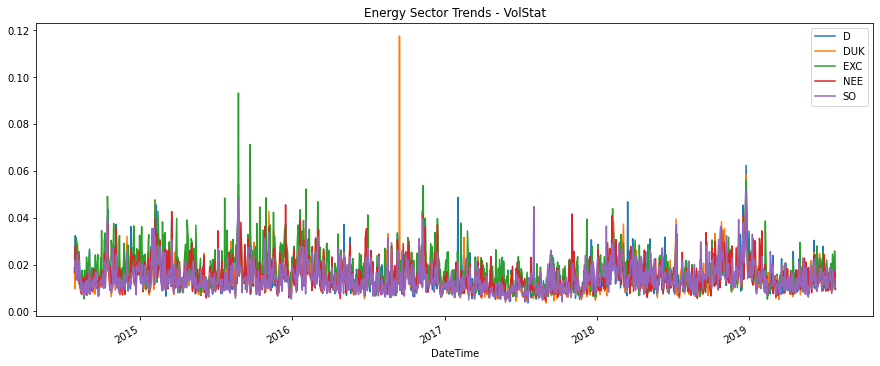

In [57]:
fig, ax = plt.subplots(figsize=(15,6))
agg_df.groupby('Symbol')['VolStat'].plot(ax=ax, legend=True, title='Energy Sector Trends - VolStat');

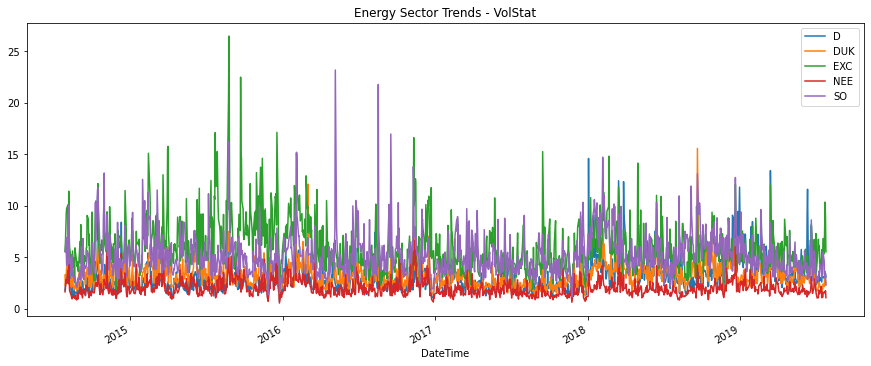

In [61]:
fig, ax = plt.subplots(figsize=(15,6))
agg_df.groupby('Symbol')['Volume_Millions'].plot(ax=ax, legend=True, title='Energy Sector Trends - VolStat');

Notamos que los períodos de alta volatilidad tienden a "agruparse"; es decir, los períodos de alta volatilidad no se distribuyen de manera uniforme y aleatoria a lo largo del tiempo, sino que tienden a ocurrir en ráfagas altamente concentradas. Esta es una idea interesante que no podríamos obtener solo mirando los datos en formato tabular. En casos futuros, profundizará en las numerosas capacidades gráficas de Python y cómo integrarlas en su flujo de trabajo de ciencia de datos.

### Ejercicio 8:

Escriba un códigos para encontrar e imprimir el mes que tiene el mayor volumen promedio diario de transacciones para cada símbolo. Incluir también el valor del volumen medio correspondiente a ese mes. Por ejemplo, el símbolo D tiene su volumen promedio diario de negociación más alto de 6.437 millones en diciembre de 2018.


In [58]:
yearmonth_list = []
for i in agg_df['Date']:
    yearmonth_list.append(i[:4]+i[5:7])
    
agg_df['YYYYMM'] = yearmonth_list
agg_df

,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Millions,Symbol,VolStat,Return,YYYY,YYYYMM
DateTime,,,,,,,,,,,,,
2014-07-28,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,1.8064,D,0.018781,0.016201,2014,201407
2014-07-29,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,2.2311,D,0.014858,-0.010471,2014,201407
2014-07-30,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,2.5889,D,0.032286,-0.014714,2014,201407
2014-07-31,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,3.2669,D,0.018505,-0.014425,2014,201407
2014-08-01,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,2.6018,D,0.017674,0.003861,2014,201408
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-22,2019-07-22,88.599998,88.690002,87.839996,88.150002,88.150002,2160300,2.1603,DUK,0.009594,-0.005079,2019,201907
2019-07-23,2019-07-23,88.180000,88.239998,87.370003,87.680000,87.680000,3141800,3.1418,DUK,0.009866,-0.005670,2019,201907
2019-07-24,2019-07-24,87.949997,87.980003,86.800003,87.180000,87.180000,2386500,2.3865,DUK,0.013417,-0.008755,2019,201907


In [59]:
grp = agg_df.groupby('Symbol')
for item in grp:
    print('------Symbol: ', item[0])
    grp_df = item[1]
    relevant_df = grp_df[['YYYYMM','Volume_Millions']]
    yearmonth_df = relevant_df.groupby('YYYYMM').mean()
    
    max_volume = float(yearmonth_df.max())
    print(yearmonth_df[yearmonth_df['Volume_Millions'] == max_volume])

------Symbol:  D
        Volume_Millions
YYYYMM                 
201812         6.437421
------Symbol:  DUK
        Volume_Millions
YYYYMM                 
201809         4.624937
------Symbol:  EXC
        Volume_Millions
YYYYMM                 
201602          9.66578
------Symbol:  NEE
        Volume_Millions
YYYYMM                 
201611         3.618452
------Symbol:  SO
        Volume_Millions
YYYYMM                 
201802         8.456853


## Conclusiones

Habiendo completado el análisis de los datos bursátiles del sector energético, hemos identificado una serie de patrones interesantes que relacionan la volatilidad con el volumen de negociación. Específicamente, encontramos que los períodos de alta volatilidad también exhiben un volumen muy alto. Esta tendencia es consistente en todos los símbolos.

También vimos que cada acción exhibió un "agrupamiento de volatilidad": los períodos de alta volatilidad tienden a agruparse. Cada una de las acciones experimentó una alta volatilidad en momentos relativamente similares, lo que sugiere que algún factor de mercado más amplio puede estar afectando al sector energético.

## Para llevar

En este caso, hemos aprendido las bases de la biblioteca ```pandas``` en Python. Ahora sabemos cómo:

1. Leer datos de archivos CSV
2. Agrega y manipula datos usando ```pandas```
3. Analice estadísticas resumidas y recopile información de tendencias a lo largo del tiempo

En el futuro, podremos usar ```pandas``` como un marco de análisis de datos para construir proyectos más complejos y resolver problemas comerciales críticos.